## Combining unity VR data with imaging data
Temporal alignment using recrded microscope frame trigger signal in unity log

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from os.path import sep
from scipy.signal import savgol_filter

from unityvr.preproc import logproc
from unityvr.viz import viz, utils
from unityvr.analysis import align2img

import unityvr.analysis.headDirection as hd
from scipy.stats import circmean, circvar

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
%config Completer.use_jedi = False  #magic to fix autocomplete issue

#### Set paths and parameters

In [2]:
convf = 10 # to cm

# filter values
order = 3
window = 7

#root = '/groups/jayaraman/jayaramanlab/Hannah/Projects/FlyVR2P/Data/'#'/Volumes/jayaramanlab/Hannah/Projects/FlyVR2P/Data/'#'../../data_unityvr/' 
root = 'Y:\\Abby\\Data\\Fly2PImaging\\SS96_x_sCaMP77D4'
img = 'img'
vr = 'uvr'

In [3]:
#subdir = 'grassG/SS96_x_7f/EB/f09'
subdir = 'f11'
condition = 'White20bar_dark_50perdim' #'grA2s'
trial = 'trial01'

#preprocDir = sep.join([root, 'preproc', subdir,condition, trial])
preprocDir = sep.join([root, subdir])
saveDir = sep.join([root, 'plot', subdir,'comboImgVR'])
print(saveDir)

utils.makemydir(saveDir)

Y:\Abby\Data\Fly2PImaging\SS96_x_sCaMP77D4\plot\f11\comboImgVR


In [4]:
preprocDir

'Y:\\Abby\\Data\\Fly2PImaging\\SS96_x_sCaMP77D4\\f11'

### Load data and find alignment between imaging and unity frames

In [5]:
uvrDat = logproc.loadUVRData("Y:\\Abby\\Data\\Fly2PImaging\\SS96_x_sCaMP77D4preproc\\f11\\50perdim\\trial0perdim\\uvr")


In [6]:
imgDat = pd.read_csv(sep.join([preprocDir, img,'roiDFF.csv'])).drop(columns=['Unnamed: 0'])

In [7]:
with open(sep.join([preprocDir, img,'imgMetadata.json'])) as json_file:
    imgMetadat = json.load(json_file)

Truncated recording. Difference in length: 10 unity frames


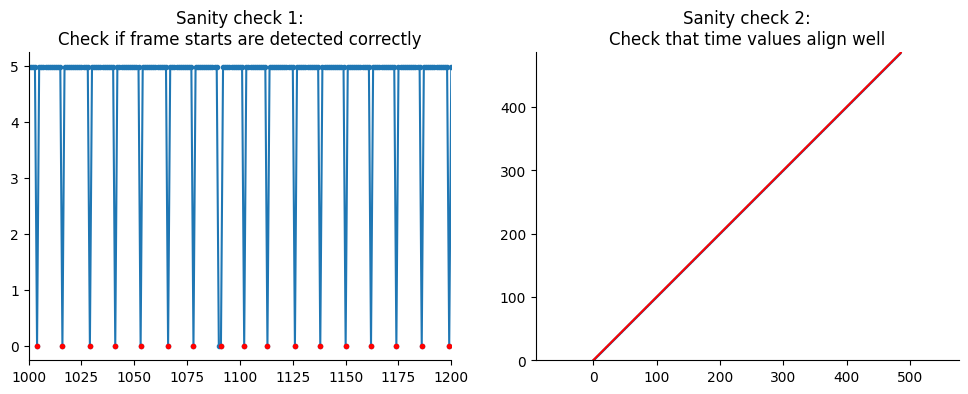

In [8]:
uvrDat.vidDf = pd.DataFrame()
expDf = align2img.generateUnityExpDf(imgDat['time [s]'].values, uvrDat, imgMetadat, timeStr = 'time [s]').reset_index(drop = True)

In [9]:
truncImgDat = align2img.truncateImgDataToUnityDf(imgDat, expDf, timeStr = 'time [s]')

In [12]:
from unityvr.analysis import posAnalysis as pa

In [13]:
pa.computeVelocities(expDf)

,frame,time,dt,x,y,angle,dx,dy,dxattempt,dyattempt,time [s],vT,vR,vT_filt,vR_filt
0,338.0,0.333333,0.333333,0.001774,0.000176,358.988957,0.001110,0.000059,0.001110,0.000059,0.000000,0.222658,2.760716,0.633518,2.886782
1,361.0,0.440303,0.006920,0.009176,-0.000366,349.183302,-0.000276,0.000266,-0.000276,0.000266,0.160701,8.643180,0.953585,6.657146,0.778700
2,384.0,0.600030,0.006943,0.013300,0.003378,9.037750,0.000026,-0.000357,0.000026,-0.000357,0.321402,5.357404,-0.187179,8.590611,-0.471699
3,407.0,0.759759,0.006945,0.016082,0.002400,9.516937,0.000153,-0.000075,0.000153,-0.000075,0.482103,9.004676,-1.242353,7.714991,-0.876742
4,430.0,0.919486,0.006946,0.025264,0.007024,19.119415,0.000117,0.000135,0.000117,0.000135,0.642804,7.144106,-0.916910,4.855289,0.005270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,70025.0,484.618067,0.006979,-0.117982,0.038625,24.877533,0.000556,0.000149,0.000556,0.000149,484.352552,7.796998,-1.049225,3.243928,-0.056935
3015,70049.0,484.785029,0.006960,-0.115569,0.040235,22.376892,0.000402,-0.000529,0.000402,-0.000529,484.513253,1.514383,0.185261,3.849534,0.654514
3016,70072.0,484.945063,0.006957,-0.115875,0.038703,6.398499,0.000606,0.000107,0.000606,0.000107,484.673954,3.527405,2.538284,4.625853,1.398608
3017,70095.0,485.105097,0.006956,-0.110700,0.040851,27.453461,0.000295,0.000335,0.000295,0.000335,484.834655,7.758089,0.157817,6.040704,0.839390


Metadata:

expid  :  SS00096_x_sCaMP77D4_whiteBar20_Dark_50perdim
experiment  :  holder V2, closed loop panorama, 144 Hz frame rate, collected by Abby
genotype  :  SS00096_x_sCaMP77D4
sex  :  female
flyid  :  f11
trial  :  trial0perdim
date  :  2024-09-27
time  :  23-28-26
ballRad  :  0.04699999839067459
setFrameRate  :  144
notes  :  EB, new filter set
angle_convention  :  right-handed
length of imaging data (ROI time series) 3029
Truncated recording. Difference in length: 10
aligning: posDf has not been processed.
aligning: posDf did not contain tortuosity, curvature, voltes or stitched positions
aligning: posDf did not contain flight
aligning: posDf did not contain clipped


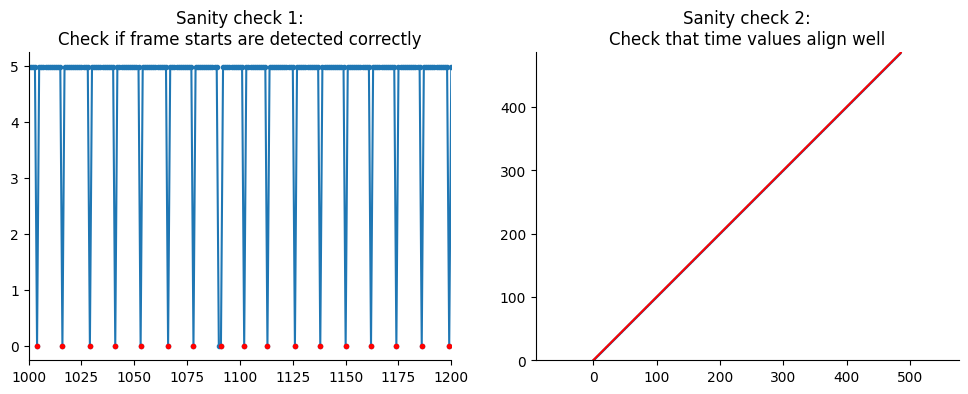

In [15]:
imgDat = pd.read_csv(sep.join([preprocDir, img,'roiDFF.csv'])).drop(columns=['Unnamed: 0'])

with open(sep.join([preprocDir, img,'imgMetadata.json'])) as json_file:
    imgMetadat = json.load(json_file)
    
#uvrDat = logproc.loadUVRData(sep.join([preprocDir, vr]))
uvrDat = logproc.loadUVRData("Y:\\Abby\\Data\\Fly2PImaging\\SS96_x_sCaMP77D4preproc\\f11\\50perdim\\trial0perdim\\uvr")
#Y:\Abby\Data\Fly2PImaging\SS96_x_sCaMP77D4preproc\f03\50perdim\trial0perdim\uvr
uvrDat.printMetadata()
posDf = uvrDat.posDf

imgInd, volFramePos = align2img.findImgFrameTimes(uvrDat,imgMetadat)
print('length of imaging data (ROI time series) {}'.format(len(imgDat)))
try:
    fig = align2img.debugAlignmentPlots(uvrDat,imgMetadat, imgInd, volFramePos)
except ValueError:
    print('mismatch in file length')

expDf = align2img.combineImagingAndPosDf(imgDat, posDf, volFramePos)
# this adds derrived velocities to the dataframe

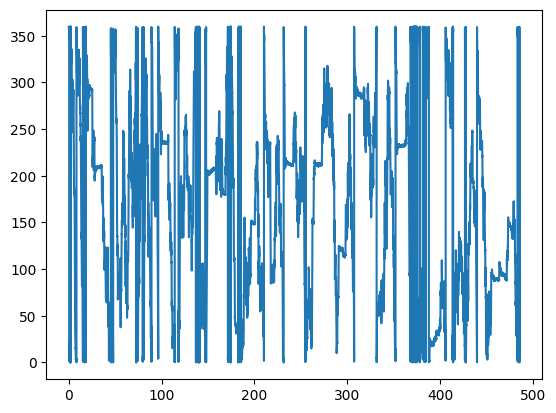

In [253]:
plt.plot(uvrDat.posDf.time,uvrDat.posDf.angle)

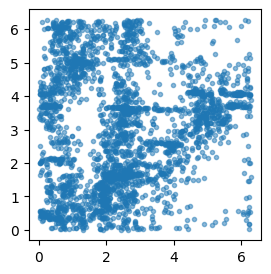

In [259]:
plt.figure(figsize = (3,3))
plt.plot(pvaRad,np.deg2rad(expDf.angle),'.',alpha=0.5)



In [267]:
expDf['pvaRad'], _, _ = hd.getEBBumpPVA(expDf)


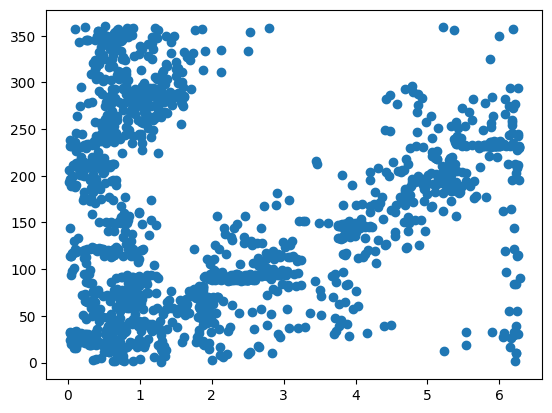

In [273]:
plt.plot(expDf.loc[(expDf['time [s]']>=187)&(expDf['time [s]']>=247)]['pvaRad'], expDf.loc[(expDf['time [s]']>=187)&(expDf['time [s]']>=247)]['angle'],'o')

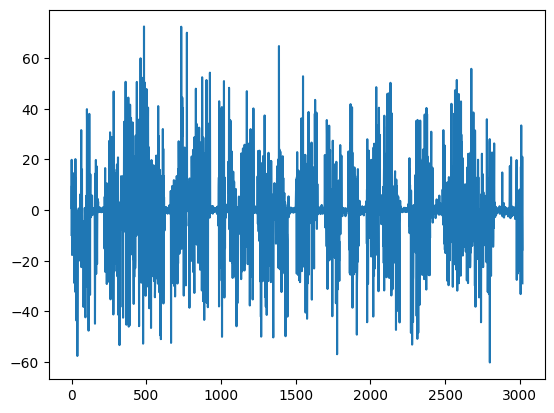

In [281]:
plt.plot(np.diff(np.unwrap(expDf['angle'], period=360)))
#plt.plot(expDf['angle'])

In [261]:
expDf.angle.shape

(3019,)

In [23]:
posDf.iloc[-1]

frame        70131.000000
time           485.355585
dt               0.006957
x               -0.107706
y                0.043001
angle           14.862274
dx              -0.000120
dy              -0.000456
dxattempt       -0.000120
dyattempt       -0.000456
vT               0.677449
vR               1.535126
vT_filt          0.748268
vR_filt          1.607871
Name: 69794, dtype: float64

In [68]:
expDf

,slice1,slice2,slice3,slice4,slice5,slice6,slice7,slice8,slice9,slice10,...,x,y,angle,vT,vR,vTfilt,vRfilt,flight,clipped,abs_vRfilt
0,2.008351,2.194434,2.264337,2.387165,2.542057,2.806948,2.607892,2.550077,2.593435,2.584700,...,0.001774,0.000176,358.988957,0.042822,-0.627454,1.487887,-0.575548,0.0,0.0,0.575548
1,2.083489,2.283281,2.418406,2.554149,2.672636,2.796481,2.702815,2.796925,2.681754,2.486500,...,0.009176,-0.000366,349.183302,0.558162,0.142973,0.340431,0.073274,0.0,0.0,0.073274
2,2.132723,2.296391,2.460748,2.526711,2.624374,2.679404,2.687947,2.807349,2.639338,2.423351,...,0.013300,0.003378,9.037750,0.127893,1.746964,0.234232,1.770367,0.0,0.0,1.770367
3,2.149138,2.256078,2.420431,2.390039,2.483749,2.529711,2.605434,2.689996,2.537636,2.395262,...,0.016082,0.002400,9.516937,0.189180,0.661514,0.410425,0.620171,0.0,0.0,0.620171
4,2.111479,2.220348,2.326887,2.258456,2.430036,2.538849,2.513771,2.578606,2.459896,2.387271,...,0.025264,0.007024,19.119415,0.348525,-0.137253,0.777494,-0.726246,0.0,0.0,0.726246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,1.899887,2.025801,2.033237,2.160489,2.152110,2.073667,2.038846,2.143297,2.046929,2.002830,...,-0.117982,0.038625,24.877533,0.649592,1.449463,0.423228,0.929718,0.0,0.0,0.929718
3015,1.973741,1.977044,2.034476,2.125309,2.109917,2.075792,2.082802,2.247248,2.139833,1.992503,...,-0.115569,0.040235,22.376892,0.605913,-0.877274,0.592164,-1.271480,0.0,0.0,1.271480
3016,2.076698,2.025557,2.100416,2.170820,2.089897,2.103184,2.159322,2.189873,2.159229,2.023385,...,-0.115875,0.038703,6.398499,0.470739,1.271805,0.663415,1.048017,0.0,0.0,1.048017
3017,2.057936,1.983662,2.093250,2.150840,2.039771,2.067223,2.122627,2.149118,2.206193,2.050640,...,-0.110700,0.040851,27.453461,0.517189,-1.254013,0.623135,-1.315736,0.0,0.0,1.315736


In [231]:
expDf.columns.values

array(['slice1', 'slice2', 'slice3', 'slice4', 'slice5', 'slice6',
       'slice7', 'slice8', 'slice9', 'slice10', 'slice11', 'slice12',
       'slice13', 'slice14', 'slice15', 'slice16', 'slice17', 'slice18',
       'slice19', 'slice20', 'slice21', 'slice22', 'slice23', 'slice24',
       'slice25', 'slice26', 'slice27', 'slice28', 'slice29', 'slice30',
       'slice31', 'slice32', 'time [s]', 'posTime', 'frame', 'x', 'y',
       'angle', 'vT', 'vR', 'vTfilt', 'vRfilt', 'flight', 'clipped',
       'abs_vRfilt'], dtype=object)

In [126]:
max(expDf['vR'])

3.022430419921875

In [128]:
expDf['time [s]'][0:10]

0    0.000000
1    0.160701
2    0.321402
3    0.482103
4    0.642804
5    0.803505
6    0.964205
7    1.124906
8    1.285607
9    1.446308
Name: time [s], dtype: float64

In [67]:
len(expDf['frame'])

3019

In [47]:
expDf['abs_vRfilt'] = expDf['vRfilt'].abs()
expDf['vRfilt'].max()

2.989308839746891

In [75]:
Chunksize = 6.22
perSec = np.floor(len(BumpPeaks)/Chunksize)
Chunksize*perSec

3016.7

In [86]:
# make more robust later
expDf['time [s]'][0:10]

# approx 6 time steps= 1 sec


0    0.000000
1    0.160701
2    0.321402
3    0.482103
4    0.642804
5    0.803505
6    0.964205
7    1.124906
8    1.285607
9    1.446308
Name: time [s], dtype: float64

In [242]:
BumpPeaks[0:].shape

(3019, 1)

In [243]:
# num of cols
#cols = np.floor(BumpPeaks[0:].shape/6)
cols = int(3019/6)
cols

503

In [98]:
# check
6*503

3018

In [118]:
# max of the dF/F
BumpPeaks =np.max(expDf.iloc[:,0:32],axis=1)
# need to add another dim to reshape as matrix
BumpPeaks = BumpPeaks[...,None]

# reshape into groups of 6 
dFperSec = np.reshape(BumpPeaks[0:3018], (6,cols))
dFperSec = np.mean(dFperSec, axis=0)




C:\Users\FANG\AppData\Local\Temp\ipykernel_35364\2483093306.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  BumpPeaks = BumpPeaks[...,None]


array([2.62095491, 2.6025937 , 2.61557325, 2.60393246, 2.54532198,
       2.53789202, 2.54332666, 2.57372578, 2.56447951, 2.58750828,
       2.57146776, 2.58084925, 2.58191343, 2.5896184 , 2.5448513 ,
       2.56355302, 2.59079238, 2.59795606, 2.6208752 , 2.58687834,
       2.58970269, 2.55273298, 2.53380966, 2.5610532 , 2.5865202 ,
       2.63539553, 2.65786302, 2.65552155, 2.63223636, 2.615364  ,
       2.58646711, 2.59570086, 2.60064773, 2.58697351, 2.5571806 ,
       2.5755351 , 2.60158948, 2.58676064, 2.60273961, 2.58196497,
       2.57245739, 2.54066118, 2.57529887, 2.57335671, 2.55576785,
       2.54101308, 2.55946175, 2.57136846, 2.56227291, 2.52366432,
       2.50564603, 2.49223165, 2.50169456, 2.53187581, 2.57425769,
       2.55075689, 2.51687523, 2.50154487, 2.53084862, 2.5191708 ,
       2.52786779, 2.51866229, 2.53814058, 2.56193042, 2.57797468,
       2.63678972, 2.64540311, 2.62674797, 2.6154422 , 2.60689167,
       2.6068031 , 2.64444538, 2.66324373, 2.69124738, 2.69668

In [139]:
# rotational velocity per second
vRfilt = expDf['vRfilt']
vRfilt = vRfilt[...,None]

# reshape into groups of 6 
vRfilt = np.reshape(vRfilt[0:3018], (6,cols))
vRfilt = np.sum(vRfilt, axis=0)

vRfilt=np.abs(vRfilt)
vRfilt_abs = vRfilt #vRfilt*180/np.pi

vRfilt.shape

C:\Users\FANG\AppData\Local\Temp\ipykernel_35364\3813487258.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  vRfilt = vRfilt[...,None]


(503,)

In [244]:
max(expDf.vRfilt)

2.989308839746891

In [245]:
np.mean(expDf.vRfilt)

-0.02547108154091949

In [246]:
sum(expDf.vRfilt[3000:3006])

-0.6280597505115331

In [264]:
expDf.vR.shape

(3019,)

ValueError: x and y must be the same size

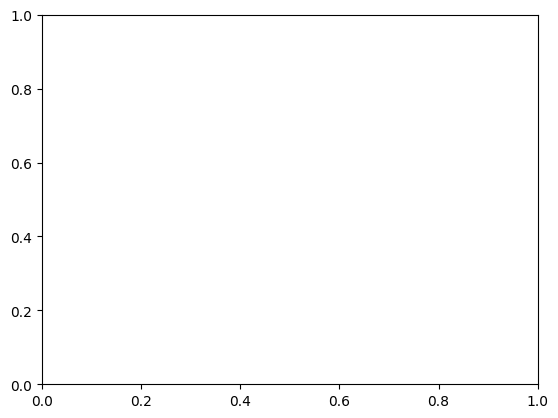

In [263]:
plt.scatter(expDf.vR,dFperSec)

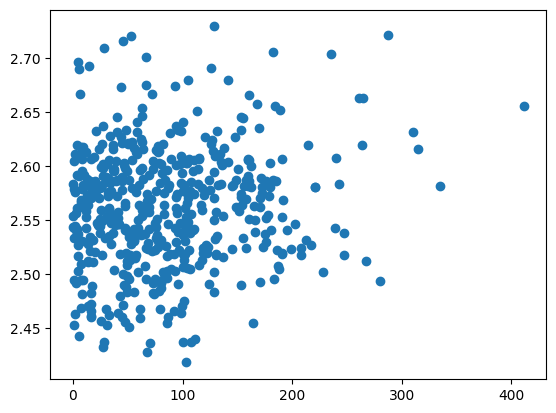

In [140]:
plt.scatter(vRfilt_abs,dFperSec)

In [143]:
dF_vRfiltDF = pd.DataFrame(data=vRfilt_abs, columns=['vRfilt_abs [deg]'])
dF_vRfiltDF['dFperSec'] = dFperSec
dF_vRfiltDF

,vRfilt_abs [deg],dFperSec
0,49.918233,2.620955
1,179.397185,2.602594
2,63.631551,2.615573
3,135.342897,2.603932
4,38.710508,2.545322
...,...,...
498,48.038985,2.487839
499,100.699363,2.506445
500,101.967852,2.518460
501,122.297998,2.519260


In [188]:
'''bins=[50,100,150,200,250,300,350,400]
dF_vRfiltDF['binned'] = pd.cut(dF_vRfiltDF['vRfilt_abs [deg]', bins])
print(dF_vRfiltDF)'''

# filter df and find avg

#df = df.loc[(df['Col 2'] == 'High') | (df['Col2'] == 'Medium')]
# needs to be betwen 50 and 100 , etc
vR0to50 = dF_vRfiltDF.loc[dF_vRfiltDF['vRfilt_abs [deg]'] <=50]
dfmean0to50 = vR0to50['dFperSec'].mean()

vR50to100 = dF_vRfiltDF[dF_vRfiltDF['vRfilt_abs [deg]'].between(50, 100)]
dfmean50to100 = vR50to100['dFperSec'].mean()

vR100to150 = dF_vRfiltDF[dF_vRfiltDF['vRfilt_abs [deg]'].between(100, 150)]
dfmean100to150 = vR100to150['dFperSec'].mean()

vR150to200 = dF_vRfiltDF[dF_vRfiltDF['vRfilt_abs [deg]'].between(150, 200)]
dfmean150to200 = vR150to200['dFperSec'].mean()

vR200to250 = dF_vRfiltDF[dF_vRfiltDF['vRfilt_abs [deg]'].between(200, 250)]
dfmean200to250 = vR200to250['dFperSec'].mean()



In [218]:
dFbinnedvR = [dfmean0to50, dfmean50to100, dfmean100to150, dfmean150to200, dfmean200to250]
dFbinnedvR = np.asarray(dFbinnedvR)
dFbinnedvR = dFbinnedvR


In [225]:
dFbinnedvR_df = pd.DataFrame(dFbinnedvR.T)
dFbinnedvR_df = dFbinnedvR_df.transpose()
dFbinnedvR_df = dFbinnedvR_df.rename(columns={'1':'0to50'})
dFbinnedvR_df

,0,1,2,3,4
0,2.557465,2.556087,2.563713,2.571817,2.561668


#### save binned vR and dF/F data to csv file

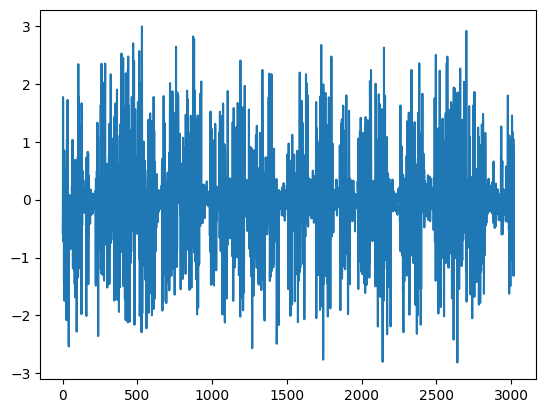

In [51]:
plt.plot(expDf['vRfilt'])

#### Compute velocities and plot distributions

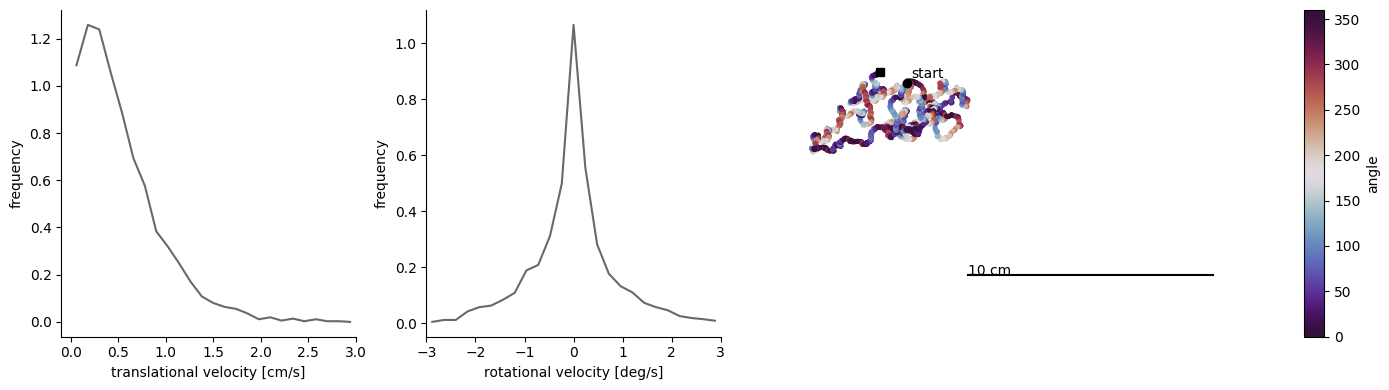

In [234]:
fig, axs = plt.subplots(1,4,figsize=(14,4),gridspec_kw={'width_ratios':[1,1,1.5,0.07]})

axs[0] = viz.plotVeloDistibution(axs[0],expDf.vT, 25, (0,3), (-0.1,3), 'translational velocity [cm/s]',lineColor='dimgrey')
axs[1] = viz.plotVeloDistibution(axs[1],expDf.vR, 25, (-3,3), (-3,3), 'rotational velocity [deg/s]',lineColor='dimgrey')
for ax in axs[0:2]:
    ax.set_ylabel('frequency')
    utils.myAxisTheme(ax)
    
axs[2], cb = viz.plotTraj(axs[2],expDf.x.values*convf,expDf.y.values*convf,expDf.angle.values,7)
utils.minimalAxisTheme(axs[2],convf,(max(expDf.x*convf),min(expDf.y*convf)-5),'10 cm')
plt.colorbar(cb,cax=axs[3],label='angle')

fig.tight_layout()
fig.savefig(saveDir+sep+'walking_trace_and_velo_{}_{}.pdf'.format(condition,trial))

In [235]:
pvaRad, pvaLen, roiArcPos = hd.getEBBumpPVA(expDf)
maxbump = hd.getMaxBumpPos(expDf)
nroi = hd.getRoiNum(expDf, roiname = 'slice')

In [238]:
pvaLen.shape

array([0.18643975, 0.18530307, 0.17344528, 0.16832134])

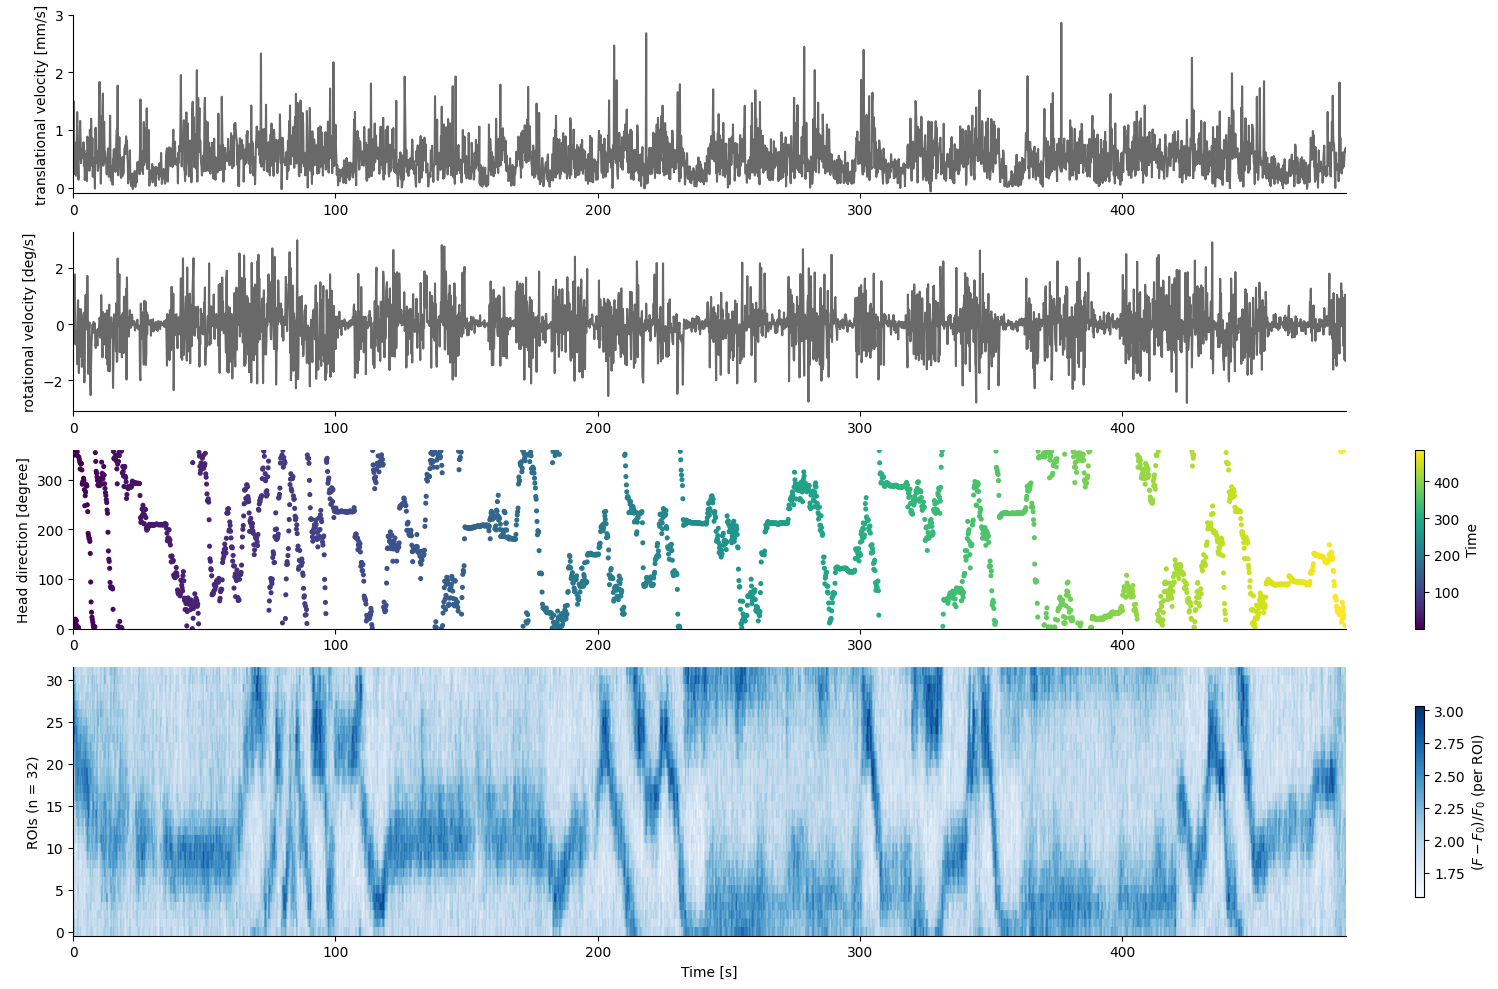

In [52]:
if np.size(uvrDat.posDf.time.values[volFramePos]) < imgDat.shape[0]:
    imgDat = imgDat[:-1]

fig, axs = plt.subplots(4,2,figsize=(15,10), gridspec_kw={'width_ratios':[10,0.5],'height_ratios':[1,1,1,1.5]})

axs[0,0].plot(expDf.posTime.values,expDf.vTfilt.values, color='dimgrey')
axs[0,0].set_ylabel('translational velocity [mm/s]')
axs[0,0].set_ylim(-0.1,3)

axs[1,0].plot(expDf.posTime.values,expDf.vRfilt.values,color='dimgrey')
axs[1,0].set_ylabel('rotational velocity [deg/s]')

cax1 = axs[2,0].scatter(expDf.posTime, expDf.angle.values,s=7,c=expDf.posTime.values,cmap='viridis')
axs[2,0].set_ylabel('Head direction [degree]')
axs[2,0].set_ylim(0,360)


axs[3,0], cax2 = hd.plotDFFheatmap(axs[3,0],expDf, roiname='slice')

for ax in axs[:,0]:
    ax.set_xlim(0,expDf.posTime.values[-1])
    utils.myAxisTheme(ax)
for ax in axs[:,1]:
    ax.axis('off')

# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = fig.colorbar(cax1, ax=axs[2,1])
cbar.set_label('Time')  # vertically oriented colorbar
cbar = fig.colorbar(cax2, ax=axs[3,1])
cbar.set_label('$(F - F_0) / F_0$ (per ROI)')  # vertically oriented colorbar

fig.tight_layout()
fig.savefig(saveDir+sep+'headingAndDFF_timeseries_{}_{}.pdf'.format(condition,trial))

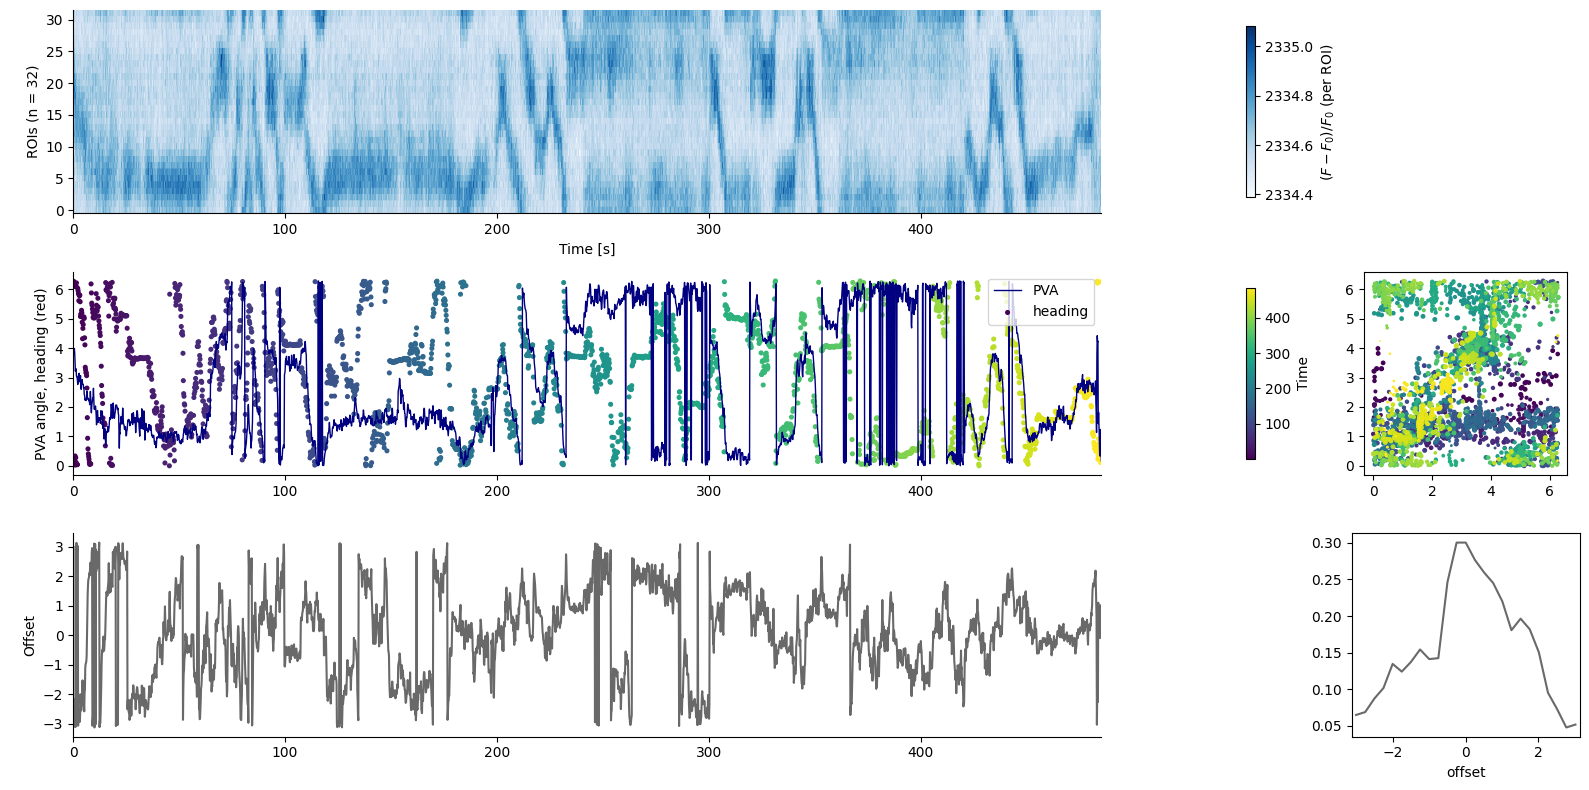

In [22]:
offset = hd.circDist(pvaRad,expDf.angle.values*np.pi/180)
meanOffset = circmean(offset)
pvaRadShift = hd.shiftPVA(pvaRad,-meanOffset)

fig, axs = plt.subplots(3,3, figsize=(16,8), gridspec_kw={'width_ratios':[9,0.5,2]})
axs[0,0], cax2 = hd.plotDFFheatmap(axs[0,0],expDf, roiname='slice')
axs[0,2].axis('off')

axs[1,0].plot(expDf.posTime, pvaRad, color='navy',linewidth=1,label='PVA')
#axs[1,0].scatter(expDf.posTime, pvaRad, c=pvaLen, s=pvaLen*50, cmap='Blues',label='PVA')
cax1 = axs[1,0].scatter(expDf.posTime, expDf.angle.values*np.pi/180,s=7,c=expDf.posTime.values,cmap='viridis', label="heading")
axs[1,0].set_ylabel('PVA angle, heading (red)')
axs[1,0].legend()
axs[1,2].scatter(expDf.angle.values*np.pi/180,pvaRad,s=pvaLen*100,c=expDf.posTime.values)
axs[1,2].set_aspect('equal')

axs[2,0].plot(expDf.posTime, hd.circDist(pvaRad,expDf.angle.values*np.pi/180),color='dimgrey', label='pvaRad')
axs[2,0].set_ylabel('Offset')
axs[2,2] = viz.plotVeloDistibution(axs[2,2],offset, 25, (-np.pi, np.pi), (-np.pi, np.pi), 'offset',lineColor='dimgrey')

for ax in axs[:,0]:
    ax.set_xlim(0,expDf.posTime.values[-1])
    utils.myAxisTheme(ax)
for ax in axs[:,1]:
    ax.axis('off')

# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = fig.colorbar(cax1, ax=axs[1,1])
cbar.set_label('Time')  # vertically oriented colorbar
cbar = fig.colorbar(cax2, ax=axs[0,1])
cbar.set_label('$(F - F_0) / F_0$ (per ROI)')  # vertically oriented colorbar

fig.tight_layout()
fig.savefig(saveDir+sep+'offsetViz_{}_{}.pdf'.format(condition,trial))

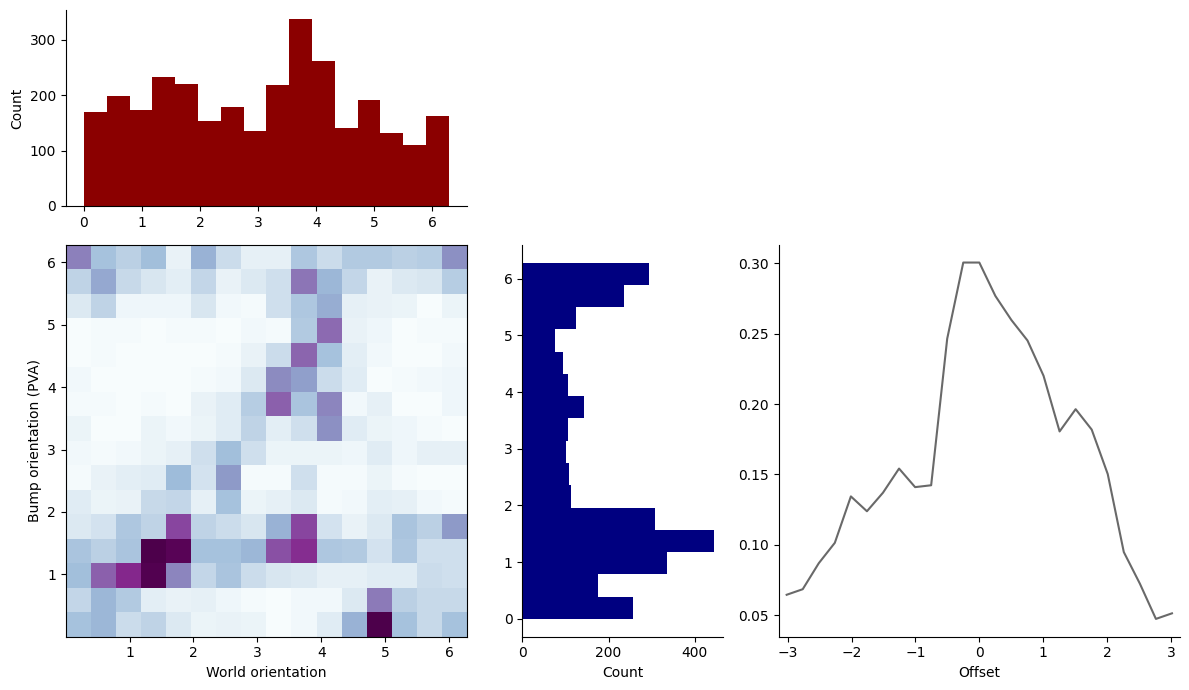

In [23]:
fig, axs = plt.subplots(2,3, figsize=(12,7), gridspec_kw={'width_ratios':[2,1,2],'height_ratios':[1,2]})
axs[0,0].hist(expDf.angle.values*np.pi/180, color='darkred', bins=(16))
axs[0,0].set_ylabel('Count')
axs[1,0].hist2d(expDf.angle.values*np.pi/180,pvaRad, bins=(16,16), cmap=plt.cm.BuPu)
axs[1,0].set_xlabel('World orientation')
axs[1,0].set_ylabel('Bump orientation (PVA)')
axs[1,1].hist(pvaRad, color='navy', bins=(16),orientation='horizontal')
axs[1,1].set_xlabel('Count')

axs[1,2] = viz.plotVeloDistibution(axs[1,2],offset, 25, (-np.pi, np.pi), (-np.pi, np.pi), 'Offset',lineColor='dimgrey')

axs[0,1].axis('off')
axs[0,2].axis('off')
utils.myAxisTheme(axs[0,0])
utils.myAxisTheme(axs[1,1])
utils.myAxisTheme(axs[1,2])

fig.tight_layout()
fig.savefig(saveDir+sep+'offsetViz2_{}_{}.pdf'.format(condition,trial))

In [24]:
meanOffset = circmean(offset)
varOffset = circvar(offset+np.pi)

offsetPva, offsetPvaLen = hd.computeVectorPVA(offset+np.pi, np.ones(len(offset)))

print(meanOffset)
print(varOffset)
print(offsetPvaLen)

0.20874141573730814
0.6785985089485336
[0.32140149]


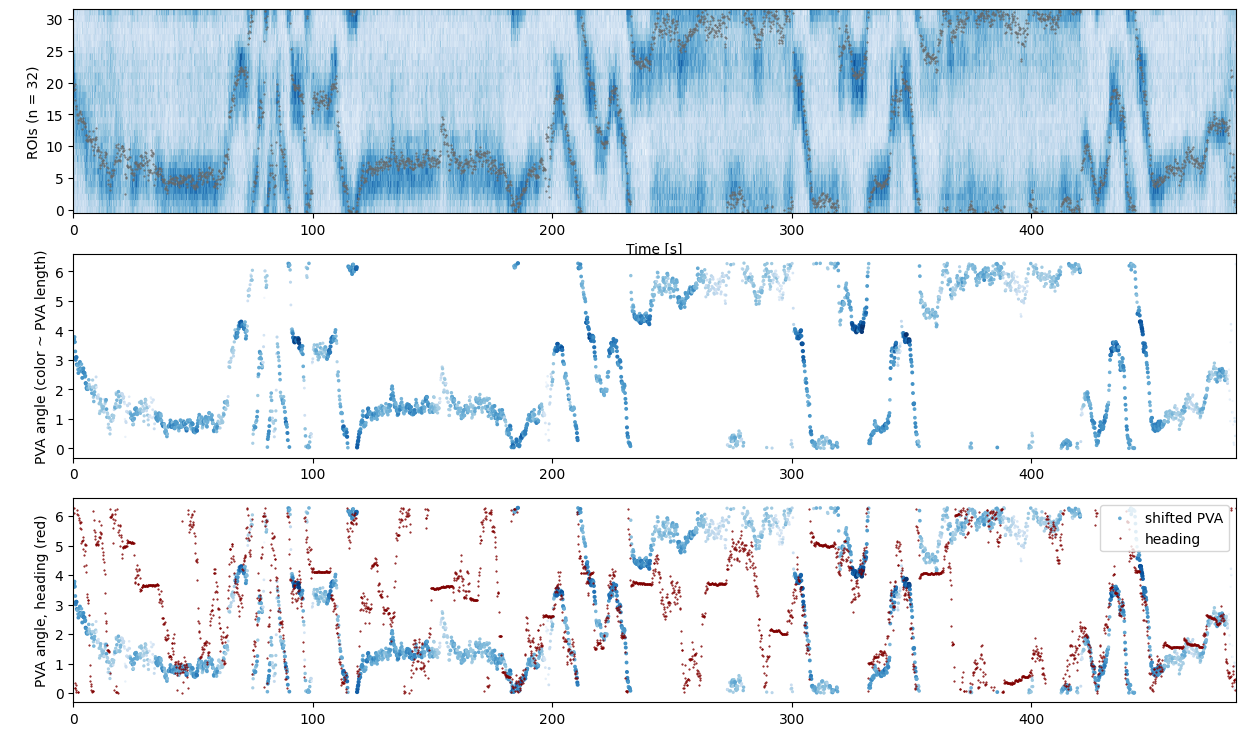

In [25]:
fig, axs = plt.subplots(3,1,figsize=(15, 9))

axs[0], cax2 = hd.plotDFFheatmap(axs[0],expDf, roiname='slice')
axs[0].plot(expDf.posTime, pvaRad*nroi/(2*np.pi)-0.5, '.',color='dimgrey', markersize=1)
#axs[0].plot(expDf.posTime, maxbump, '.',color='k', markersize=0.2)

axs[1].scatter(expDf.posTime, pvaRadShift, c=pvaLen, s=pvaLen*50, cmap='Blues')
axs[1].set_ylabel('PVA angle (color ~ PVA length)')

axs[2].scatter(expDf.posTime, pvaRadShift, c=pvaLen, s=pvaLen*50, cmap='Blues',label='shifted PVA')
axs[2].plot(expDf.posTime, expDf.angle.values*np.pi/180, '.',color='maroon', markersize=1, label='heading')
axs[2].set_ylabel('PVA angle, heading (red)')
axs[2].legend()

for ax in axs:
    ax.set_xlim(0,expDf.posTime.values[-1])

fig.savefig(saveDir+sep+'headingAndPVA_timeseries_{}_{}.pdf'.format(condition,trial))

### Trajectory with objects

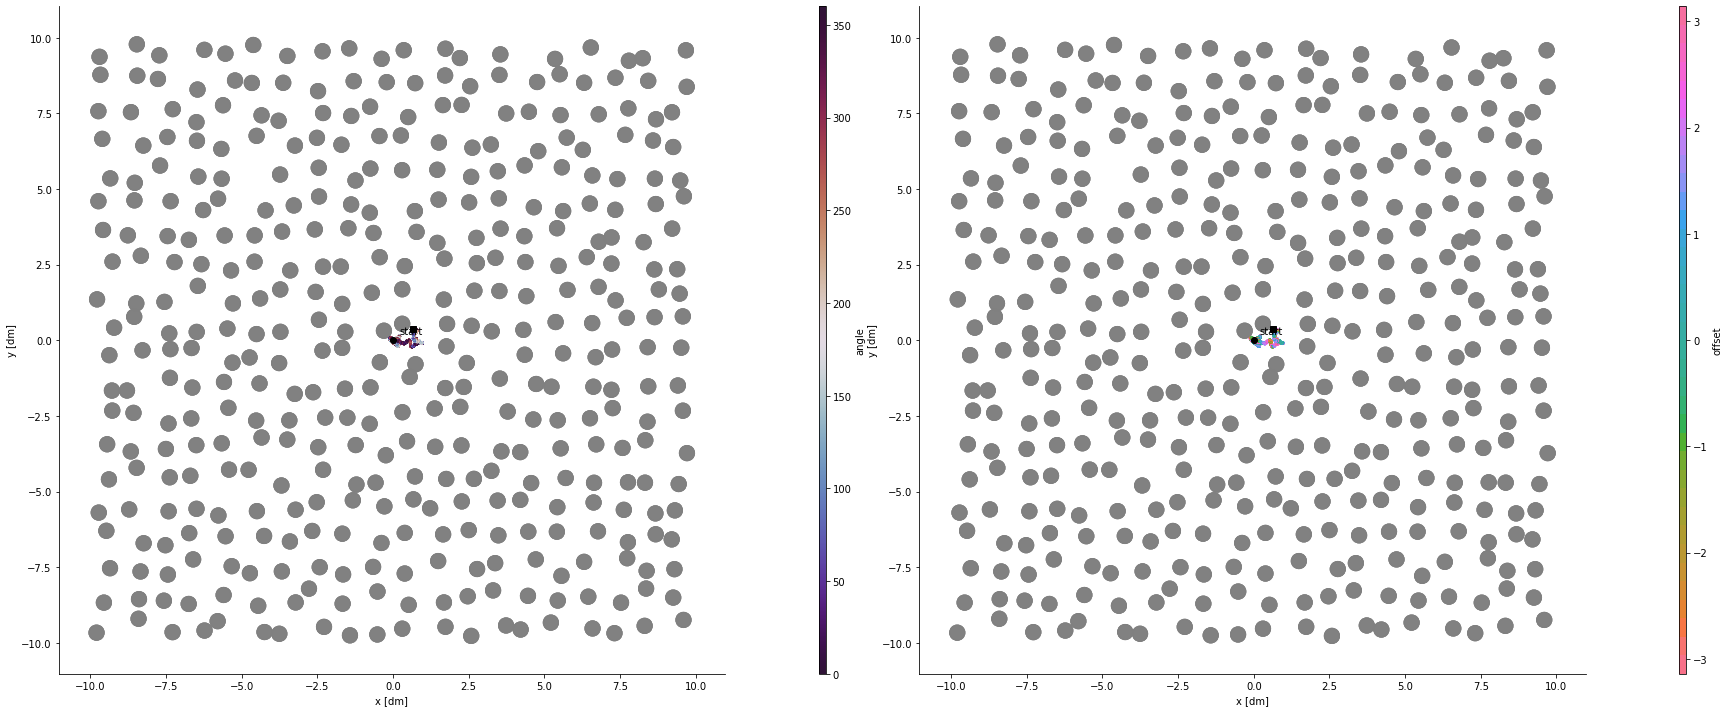

In [53]:
import seaborn as sns
import matplotlib.colors as col
n = 36
flat_huslmap = col.ListedColormap(sns.color_palette('husl',n))

fig, axs = plt.subplots(1,4,figsize=(24,10),gridspec_kw={'width_ratios':[1,0.01,1,0.01]})
viz.plotAllObjects(uvrDat,axs[0], labelobj=False, objsize=(0.5,0.5))
axs[0], cb = viz.plotTraj(axs[0],expDf.x.values,expDf.y.values,expDf.angle.values,3)
#utils.minimalAxisTheme(axs[0],convf,(max(expDf.x),min(expDf.y)-5),'1 m')
plt.sca(axs[1])
plt.colorbar(cb,cax=axs[1],label='angle')
axs[0].set_xlabel('x [dm]')
axs[0].set_ylabel('y [dm]')

viz.plotAllObjects(uvrDat,axs[2], labelobj=False, objsize=(0.5,0.5))
axs[2], cb = viz.plotTraj(axs[2],expDf.x.values,expDf.y.values,offset,3,cmap=flat_huslmap,limvals=(-np.pi,np.pi))
#utils.minimalAxisTheme(axs[0],convf,(max(expDf.x),min(expDf.y)-5),'1 m')
plt.colorbar(cb,cax=axs[3],label='offset')
axs[2].set_xlabel('x [dm]')
axs[2].set_ylabel('y [dm]')
fig.tight_layout()
fig.savefig(saveDir+sep+'trajectoryWithObjects_{}_{}.pdf'.format(condition,trial))

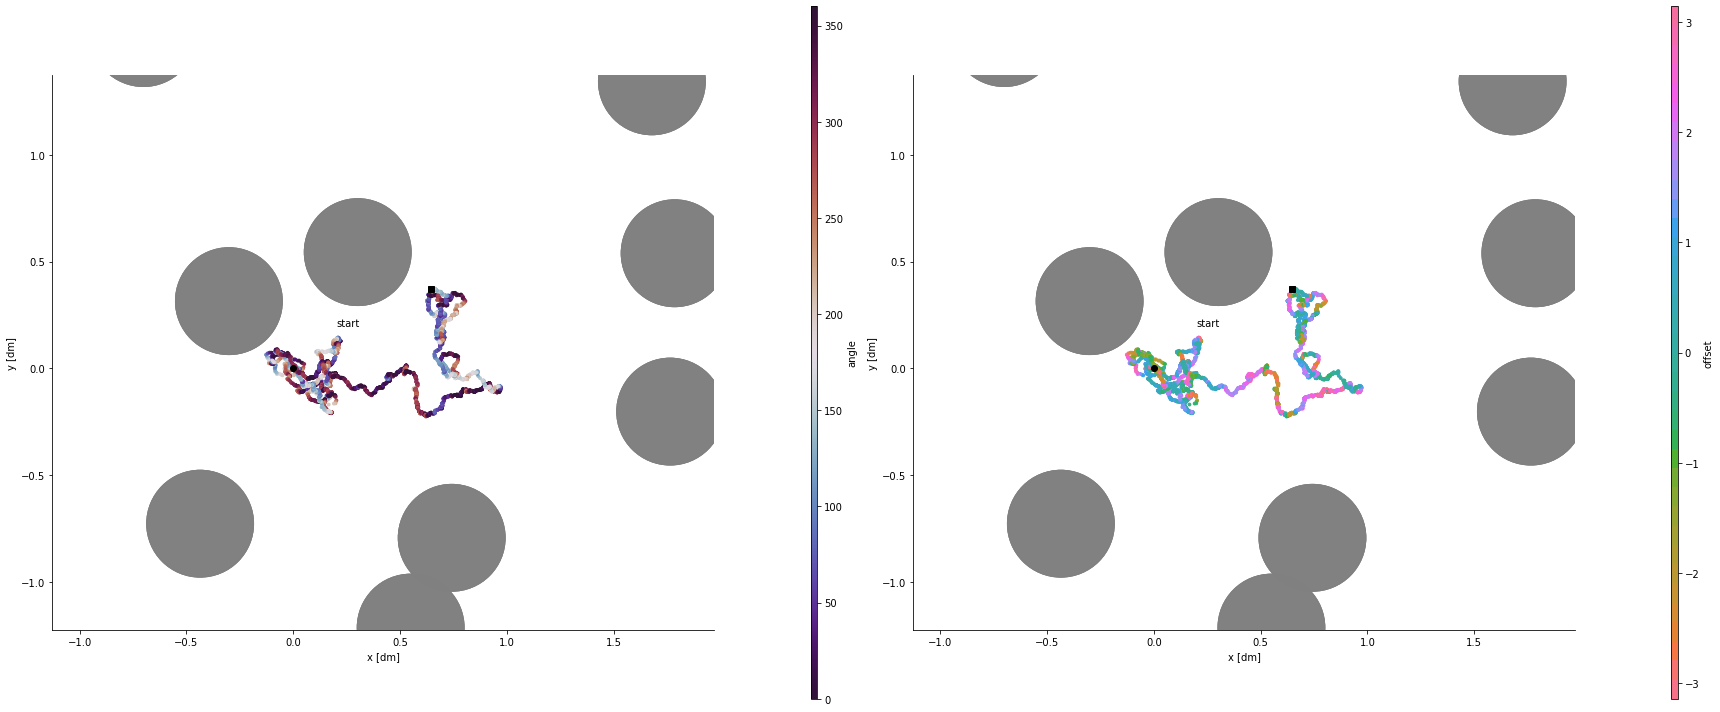

In [54]:
fig, axs = plt.subplots(1,4,figsize=(24,10),gridspec_kw={'width_ratios':[1,0.01,1,0.01]})
viz.plotAllObjects(uvrDat,axs[0], labelobj=False, objsize=(0.5,0.5))
axs[0], cb = viz.plotTraj(axs[0],expDf.x.values,expDf.y.values,expDf.angle.values,8)
#utils.minimalAxisTheme(axs[0],convf,(max(expDf.x),min(expDf.y)-5),'1 m')
plt.sca(axs[1])
plt.colorbar(cb,cax=axs[1],label='angle')
axs[0].set_xlabel('x [dm]')
axs[0].set_ylabel('y [dm]')
axs[0].set_xlim(np.min(expDf.x.values)-1, np.max(expDf.x.values)+1)
axs[0].set_ylim(np.min(expDf.y.values)-1, np.max(expDf.y.values)+1)

viz.plotAllObjects(uvrDat,axs[2], labelobj=False, objsize=(0.5,0.5))
axs[2], cb = viz.plotTraj(axs[2],expDf.x.values,expDf.y.values,offset,8,cmap=flat_huslmap,limvals=(-np.pi,np.pi))
#utils.minimalAxisTheme(axs[0],convf,(max(expDf.x),min(expDf.y)-5),'1 m')
plt.colorbar(cb,cax=axs[3],label='offset')
axs[2].set_xlabel('x [dm]')
axs[2].set_ylabel('y [dm]')
axs[2].set_xlim(np.min(expDf.x.values)-1, np.max(expDf.x.values)+1)
axs[2].set_ylim(np.min(expDf.y.values)-1, np.max(expDf.y.values)+1)

fig.tight_layout()
fig.savefig(saveDir+sep+'trajectoryWithObjects_zoom_{}_{}.pdf'.format(condition,trial))